## Thành viên nhóm

- **Trần Xuân Diện** - 22650601
- **Nguyễn Thị Viên** - 22003025
- **Trần Anh Khoa** - 22000915


### Khai báo thư viện

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Checkered board

In [2]:
def create_chessboard(square_size):
    board_size = square_size * 8
    chessboard = np.zeros((board_size, board_size), dtype=np.uint8)

    for i in range(8):
        for j in range(8):
            if (i + j) % 2 == 0:
                chessboard[i*square_size:(i+1)*square_size, j*square_size:(j+1)*square_size] = 255

    return chessboard

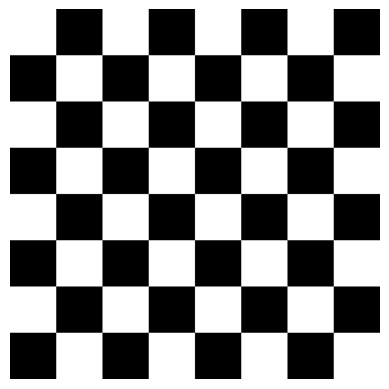

In [3]:
square_size = 100
chessboard = create_chessboard(square_size)

plt.imshow(chessboard, cmap='gray')
plt.axis('off')
plt.show()

### Color correction

In [4]:
def convert_to_gray(image):
    gray_image = image[:, :, 0]*0.07 + image[:, :, 1]*0.72 + image[:, :, 2]*0.21
    return gray_image.astype(np.uint8)

In [5]:
image = cv2.imread('image.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = convert_to_gray(image_rgb)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


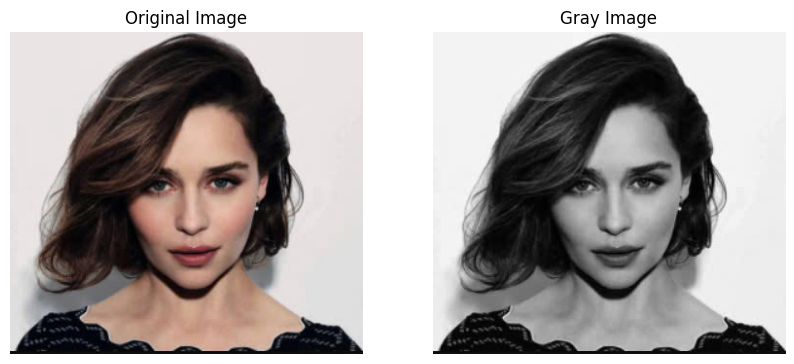

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')
plt.show()

### Rotate Image

In [ ]:
def rotate_image(image, angle):
    rad = np.deg2rad(angle)
    height, width = image.shape[:2]

    new_width = int(abs(width * np.cos(rad)) + abs(height * np.sin(rad)))
    new_height = int(abs(height * np.cos(rad)) + abs(width * np.sin(rad)))

    rotated_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    center_x, center_y = width // 2, height // 2
    new_center_x, new_center_y = new_width // 2, new_height // 2

    for i in range(new_height):
        for j in range(new_width):
            y = int((i - new_center_y) * np.cos(rad) + (j - new_center_x) * np.sin(rad) + center_y)
            x = int(-(i - new_center_y) * np.sin(rad) + (j - new_center_x) * np.cos(rad) + center_x)
            if 0 <= x < width and 0 <= y < height:
                rotated_image[i, j] = image[y, x]

    return rotated_image

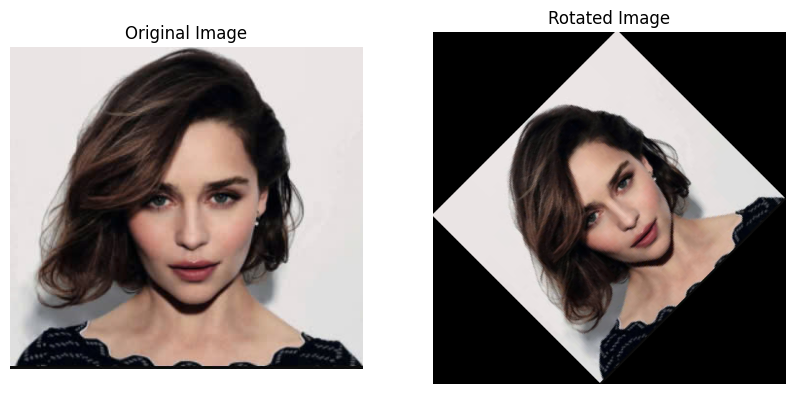

In [ ]:
angle = 45
rotated_image = rotate_image(image_rgb, angle)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

### Color Seperation

In [ ]:
def extract_object(image, t=None):
    img_gray = convert_to_gray(image)


    if t is None:
        t = np.mean(img_gray)

    img_result = np.zeros_like(img_gray)

    for i in range(img_gray.shape[0]):
        for j in range(img_gray.shape[1]):
            if img_gray[i][j] > t:
                img_result[i][j] = img_gray[i][j]
            else:
                img_result[i][j] = 0

    return img_result

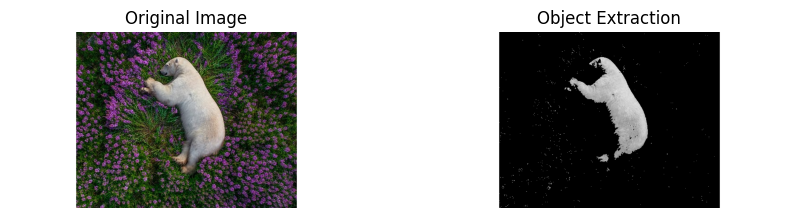

In [ ]:
img = cv2.imread('./extract_object.png')

t = 140
result = extract_object(img, t)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Object Extraction')
plt.axis('off')
plt.show()

### Corner line

In [ ]:
def draw_line(image, quadrant='top-left', color=(0, 255, 0), thickness=2):
    height, width = image.shape[:2]
    color = np.array(color, dtype=np.uint8)

    # Xác định các điểm góc của khu vực để vẽ
    if quadrant == 'top-left':
        start_y = np.random.randint(height // 5, height // 2)
        start_point = (0, start_y)
        end_x = np.random.randint(width // 5, width // 2)
        end_point = (end_x, 0)
    elif quadrant == 'top-right':
        start_x = np.random.randint(width // 2, 4 * width // 5)
        start_point = (start_x, 0)
        end_y = np.random.randint(height // 5, height // 2)
        end_point = (width, end_y)
    elif quadrant == 'bottom-left':
        start_y = np.random.randint(height // 2, 4 * height // 5)
        start_point = (0, start_y)
        end_x = np.random.randint(width // 5, width // 2)
        end_point = (end_x, height)
    elif quadrant == 'bottom-right':
        start_y = np.random.randint(height // 2, 4 * height // 5)
        start_point = (width, start_y)
        end_x = np.random.randint(width // 2, 4 * width // 5)
        end_point = (end_x, height)
    else:
        raise ValueError("Quadrant không hợp lệ. Chọn từ 'top-left', 'top-right', 'bottom-left', 'bottom-right'.")

    # Vẽ đường chéo với độ dày
    x1, y1 = start_point
    x2, y2 = end_point
    thickness = thickness // 2

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy

    while True:
        for i in range(-thickness, thickness + 1):
            for j in range(-thickness, thickness + 1):
                xi = x1 + i
                yi = y1 + j
                if 0 <= xi < width and 0 <= yi < height:
                    image[yi, xi] = color
        if x1 == x2 and y1 == y2:
            break
        e2 = err * 2
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy

    return image

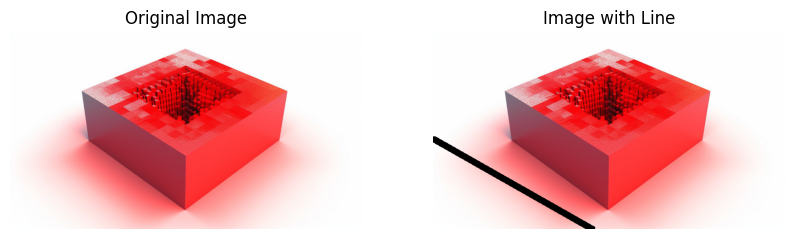

In [ ]:
image_path = 'corner_line.png'
image1 = cv2.imread(image_path)


line_color = (0, 0, 0)
line_thickness = 8
quadrant = 'bottom-left'

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

image_with_line = draw_line(image1, quadrant, line_color, line_thickness)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_line, cv2.COLOR_BGR2RGB))
plt.title('Image with Line')
plt.axis('off')
plt.show()

### Gradient

In [ ]:
def gradient(width, height, angle):
    x = np.zeros((height, width, 3), dtype=np.uint8)
    angle_rad = np.deg2rad(angle)
    y_coords, x_coords = np.indices((height, width))

    gradient_direction = (x_coords * np.cos(angle_rad) + y_coords * np.sin(angle_rad))
    gradient_direction = gradient_direction - gradient_direction.min()
    gradient_direction = gradient_direction / gradient_direction.max() * 255

    gradient_img = np.clip(gradient_direction, 0, 255).astype(np.uint8)

    x[:, :, 0] = gradient_img
    x[:, :, 1] = gradient_img
    x[:, :, 2] = gradient_img
    return x

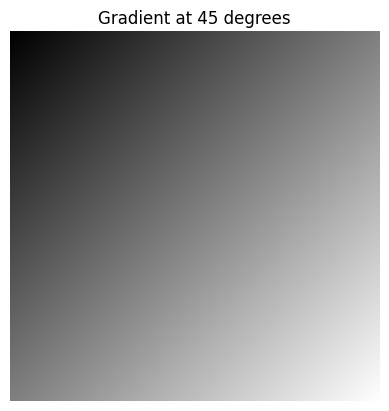

In [ ]:
width, height = 256, 256

angle = 45
gr = gradient(width, height, angle)

plt.imshow(gr)
plt.title(f'Gradient at {angle} degrees')
plt.axis('off')
plt.show()

### Letter char

In [ ]:
def letter_char(char, image_size=(500, 500), char_map=None):
    image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

    if char not in char_map:
        raise ValueError("Chữ cái không có trong bản đồ")

    char_array = np.array([list(row) for row in char_map[char]])

    char_height, char_width = char_array.shape

    cell_width = image_size[1] // char_width
    cell_height = image_size[0] // char_height

    for i in range(char_height):
        for j in range(char_width):
            if char_array[i, j] == '#':
                top_left_x = j * cell_width
                top_left_y = i * cell_height
                bottom_right_x = (j + 1) * cell_width
                bottom_right_y = (i + 1) * cell_height
                image[top_left_y:bottom_right_y, top_left_x:bottom_right_x] = [0, 0, 0]

    return image

In [ ]:
char_map = {
    'A': [
        '   ##    ',
        '  #  #   ',
        ' #    #  ',
        ' ######  ',
        ' #    #  ',
        ' #    #  ',
        '         '
    ],
    'B': [
        ' #####   ',
        ' #    #  ',
        ' #####   ',
        ' #    #  ',
        ' #    #  ',
        ' #####   ',
        '         '
    ],
    'C': [
        '  #####  ',
        ' #       ',
        ' #       ',
        ' #       ',
        ' #       ',
        '  #####  ',
        '         '
    ],
    'D': [
        ' #####   ',
        ' #    #  ',
        ' #    #  ',
        ' #    #  ',
        ' #    #  ',
        ' #####   ',
        '         '
    ],
    'E': [
        ' ######  ',
        ' #       ',
        ' #####   ',
        ' #       ',
        ' #       ',
        ' ######  ',
        '         '
    ],
    'F': [
        ' ######  ',
        ' #       ',
        ' #####   ',
        ' #       ',
        ' #       ',
        ' #       ',
        '         '
    ],
    'G': [
        '  #####  ',
        ' #       ',
        ' #   ### ',
        ' #    #  ',
        ' #    #  ',
        '  ####   ',
        '         '
    ],
    'H': [
        ' #    #  ',
        ' #    #  ',
        ' ######  ',
        ' #    #  ',
        ' #    #  ',
        ' #    #  ',
        '         '
    ],
    'I': [
        '  ###    ',
        '   #     ',
        '   #     ',
        '   #     ',
        '   #     ',
        '  ###    ',
        '         '
    ],
    'J': [
        '    ###  ',
        '     #   ',
        '     #   ',
        '     #   ',
        ' #   #   ',
        '  ###    ',
        '         '
    ],
    'K': [
        ' #    #  ',
        ' #  ##   ',
        ' ####    ',
        ' #  ##   ',
        ' #   #   ',
        ' #    #  ',
        '         '
    ],
    'L': [
        ' #       ',
        ' #       ',
        ' #       ',
        ' #       ',
        ' #       ',
        ' ######  ',
        '         '
    ],
    'M': [
        ' #    #  ',
        ' ##  ##  ',
        ' # ## #  ',
        ' #    #  ',
        ' #    #  ',
        ' #    #  ',
        '         '
    ],
    'N': [
        ' #    #  ',
        ' ##   #  ',
        ' # #  #  ',
        ' #  # #  ',
        ' #   ##  ',
        ' #    #  ',
        '         '
    ],
    'O': [
        '  ###    ',
        ' #   #   ',
        ' #   #   ',
        ' #   #   ',
        ' #   #   ',
        '  ###    ',
        '         '
    ],
    'P': [
        ' #####   ',
        ' #    #  ',
        ' #####   ',
        ' #       ',
        ' #       ',
        ' #       ',
        '         '
    ],
    'Q': [
        '  ###    ',
        ' #   #   ',
        ' #   #   ',
        ' #   #   ',
        ' #  ##   ',
        '  ####   ',
        '       # '
    ],
    'R': [
        ' #####   ',
        ' #    #  ',
        ' #####   ',
        ' #  ##   ',
        ' #   #   ',
        ' #    #  ',
        '         '
    ],
    'S': [
        '  #####  ',
        ' #       ',
        '  ####   ',
        '     #   ',
        '     #   ',
        ' #####   ',
        '         '
    ],
    'T': [
        ' ######  ',
        '   #     ',
        '   #     ',
        '   #     ',
        '   #     ',
        '   #     ',
        '         '
    ],
    'U': [
        ' #   #   ',
        ' #   #   ',
        ' #   #   ',
        ' #   #   ',
        ' #   #   ',
        '  ###    ',
        '         '
    ],
    'V': [
        ' #   #   ',
        ' #   #   ',
        '  # #    ',
        '  # #    ',
        '   #     ',
        '   #     ',
        '         '
    ],
    'W': [
        ' #   #   ',
        ' #   #   ',
        ' # # #   ',
        ' # # #   ',
        '  # #    ',
        '  # #    ',
        '         '
    ],
    'X': [
        ' #   #   ',
        '  # #    ',
        '   #     ',
        '   #     ',
        '  # #    ',
        ' #   #   ',
        '         '
    ],
    'Y': [
        ' #   #   ',
        '  # #    ',
        '   #     ',
        '   #     ',
        '   #     ',
        '   #     ',
        '         '
    ],
    'Z': [
        ' ######  ',
        '     #   ',
        '    #    ',
        '   #     ',
        '  #      ',
        ' ######  ',
        '         '
    ]
}


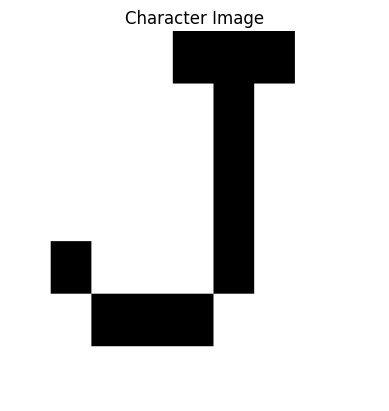

In [ ]:
char = "j".upper()

image = letter_char(char, image_size=(500, 500), char_map=char_map)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Character Image')
plt.axis('off')
plt.show()

### Find secret by subtract

In [ ]:
def secret_subtract(img1, img2):
    img1 = img1.astype(np.int32)
    img2 = img2.astype(np.int32)
    result = img1 - img2
    result = np.clip(result, 0, 255)
    return result.astype(np.uint8)

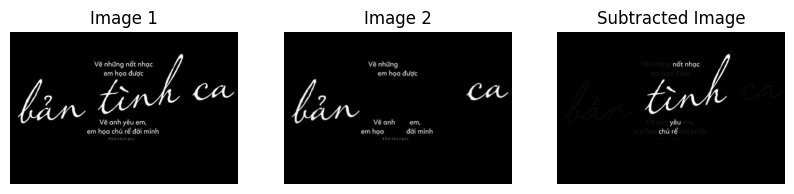

In [ ]:
img1 = cv2.imread('image.png')
img2 = cv2.imread('image2.png')

result = secret_subtract(img1, img2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Subtracted Image')
plt.axis('off')
plt.show()